In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import pickle as pkl
import math
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
path_data = '/content/drive/My Drive/Python_stuff/Bundesliga21/'

In [3]:
teams = {}
teams["Augsburg"] = 1
teams["Bayern"] = 2
teams["Bielefeld"] = 3
teams["Berlin"] = 4
teams["Bochum"] = 5
teams["Dortmund"] = 6
teams["Frankfurt"] = 7
teams["Freiburg"] = 8
teams["Fürth"] = 9
teams["Hoffenheim"] = 10
teams["Köln"] = 11
teams["Leipzig"] = 12
teams["Leverkusen"] = 13
teams["Mainz"] = 14
teams["M'gladbach"] = 15 
teams["Stuttgart"] = 16
teams["Union Berlin"] = 17
teams["Wolfsburg"] = 18

In [4]:
teilnehmer = dict()
teilnehmer[27362851] = 'Hacky'
teilnehmer[29318134] = 'Lars'
teilnehmer[29140453] = 'Dieter'
teilnehmer[26252098] = 'Henning'
teilnehmer[28320912] = 'Mirco'
teilnehmer[27383335] = 'Tobi89'
teilnehmer[29615386] = 'Johann-Lfbg'
teilnehmer[25768036] = 'Jörg'
teilnehmer[27922747] = 'OliverB'
teilnehmer[26242499] = 'onurb'
teilnehmer[26482402] = 'Schübbel'
teilnehmer[29140352] = 'Carina'
teilnehmer[26324257] = 'Oeschgie'
teilnehmer[26032575] = 'Seppi'
teilnehmer[30143645] = 'Tim'
teilnehmer[28082788] = 'MarcW'
teilnehmer[26333953] = 'Helga'
teilnehmer[26566383] = 'Jürgen'
teilnehmer[29227465] = 'Thomas'

In [5]:
filename = open(path_data + 'results_table.pkl', "rb")
results = pkl.load(filename)
filename = open(path_data + 'tipps.pkl', "rb")
tipps = pkl.load(filename)

In [ ]:
tipps[0] # Alle Tipps aus Spieltag 1 von jedem Spieler

In [ ]:
results[0] # Ergebnis von Spieltag 1 zu jeder Minute

In [6]:
# Punktzahl von Spieltag 1
min = 90 
overtime = 20
if min < 45:
  row = min
elif min == 45:
  row = min + overtime
elif min > 45 and min < 90:
  row = min + 20
elif min == 90:
  row = min + overtime + 20
results[0][row]


array([1., 1., 5., 1., 0., 4., 0., 0., 1., 0., 1., 1., 5., 2., 1., 0., 3.,
       1.])

In [7]:
def calc_points(hTipp, aTipp, hTore, aTore):
  if hTipp == hTore and aTipp == aTore: # Ergebnis richtig
    points = 4
  elif hTipp - aTipp == hTore - aTore: # Differenz richtig
    if hTipp == aTipp:
      points = 2
    else: points = 3
  elif np.sign(hTipp - aTipp) == np.sign(hTore - aTore): # Tendenz
    points = 2
  else:
    points = 0
  return points

In [14]:
def points_after_minute(bis_spieltag):
  points = np.zeros((len(teilnehmer),131))
  for i in range(len(teilnehmer)):
    points[i][0] = [*teilnehmer][i]
  for row in range(1,131):
    for k in range(bis_spieltag):
      for i in range(len(points)):
        pkt = 0
        player = points[i][0]
        row_tipps = np.where(tipps[k] == player)[0][0] # 1-19
        for j in range(9):
          hTe = results[k][0][j*2] # Heimteam
          aTe = results[k][0][j*2+1] # Auswärtsteam
          col_team1 = np.where(tipps[k][0] == hTe)[0][0] #Spalte des Teams
          col_team2 = np.where(tipps[k][0] == aTe)[0][0] #Spalte des Teams
          hTo = results[k][row][j*2] # Heimtore
          aTo = results[k][row][j*2+1] # Auswärtstore
          hTi = tipps[k][row_tipps][col_team1] # Heimtipps
          aTi = tipps[k][row_tipps][col_team2] # Auswärtstipps
          pkt += calc_points(hTi, aTi, hTo, aTo)
          # print(calc_points(hTi, aTi, hTo, aTo))
          # print(hTi, aTi, hTo, aTo)
        # print(pkt, teilnehmer[player])
        points[i][row] += pkt
  return points

In [15]:
def plot_points_after_minute(bis_spieltag):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10,7))
  points = points_after_minute(bis_spieltag)
  for i in range(len(points)):
  # for i in [0,1,2,3,4,7,9,10,11,13,16]:
    plt.plot(points[i][1:], label=str(teilnehmer[points[i][0]]))
    plt.legend(bbox_to_anchor=(0.69, 0.51, 0.5, 0.5))
  plt.axvline(x=0, linewidth=0.5, color='gray') #1.
  plt.axvline(x=44, linewidth=0.5, color='gray') #45.
  plt.axvline(x=49, linewidth=0.5, color='gray') #45.+5
  plt.axvline(x=65, linewidth=0.5, color='gray') #46.
  plt.axvline(x=109, linewidth=0.5, color='gray') #90.
  plt.axvline(x=114, linewidth=0.5, color='gray') #90.+5
  plt.axvline(x=129, linewidth=0.5, color='gray') #90.+20
  plt.xticks([0,44,49,65,109,114], ['1', '45', '45/5', '46', '90', '90/5'])
  plt.tight_layout()
  plt.savefig(path_data + 'points_development_minutes.pdf')

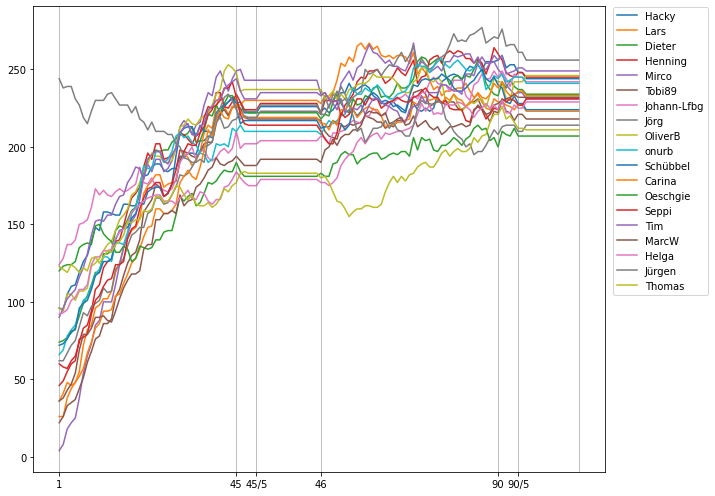

In [16]:
plot_points_after_minute(22)

In [17]:
def calc_accuracy(hTipp, aTipp, hTore, aTore):
  if hTipp == aTipp:
    row = 0
    if hTore == aTore: 
      if hTipp == hTore:
        col = 0
      else: col = 2
    else: col = 3
  elif hTipp > aTipp:
    row = 1
    if hTipp - aTipp == hTore - aTore:
      if hTipp == hTore:
        col = 0
      else: col = 1
    elif np.sign(hTipp - aTipp) == np.sign(hTore - aTore):
      col = 2
    else: col = 3
  elif hTipp < aTipp:
    row = 2
    if hTipp - aTipp == hTore - aTore:
      if hTipp == hTore:
        col = 0
      else: col = 1
    elif np.sign(hTipp - aTipp) == np.sign(hTore - aTore):
      col = 2
    else: col = 3
  else: 
    row = np.nan
    col = np.nan
  return row, col

In [23]:
def accuracy_matrix(bis_spieltag):
  matrix = dict()
  for i in range(len(teilnehmer)):
    matrix[[*teilnehmer][i]] = np.zeros((3,4))
  for k in range(bis_spieltag):
    for i in range(len(teilnehmer)):
      pkt = 0
      player = list(teilnehmer)[i]
      row_tipps = np.where(tipps[k] == player)[0][0] # 1-19
      for j in range(9):
        hTe = results[k][0][j*2] # Heimteam
        aTe = results[k][0][j*2+1] # Auswärtsteam
        col_team1 = np.where(tipps[k][0] == hTe)[0][0] #Spalte des Teams
        col_team2 = np.where(tipps[k][0] == aTe)[0][0] #Spalte des Teams
        hTo = results[k][130][j*2] # Heimtore
        aTo = results[k][130][j*2+1] # Auswärtstore
        hTi = tipps[k][row_tipps][col_team1] # Heimtipps
        aTi = tipps[k][row_tipps][col_team2] # Auswärtstipps
        row, col = calc_accuracy(hTi, aTi, hTo, aTo)
        # print(calc_points(hTi, aTi, hTo, aTo))
        # print(hTi, aTi, hTo, aTo)
        try:
          matrix[player][row][col] += 1
        except:
          pass
  return matrix

In [24]:
matrix = accuracy_matrix(22)

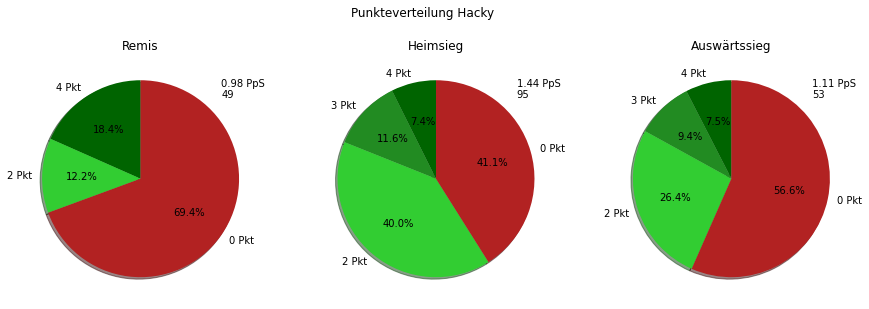

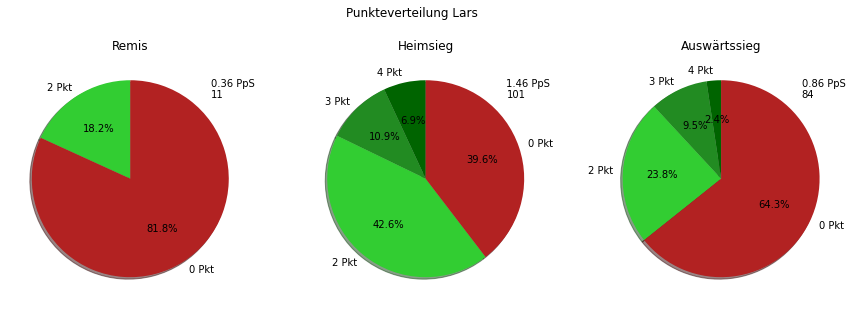

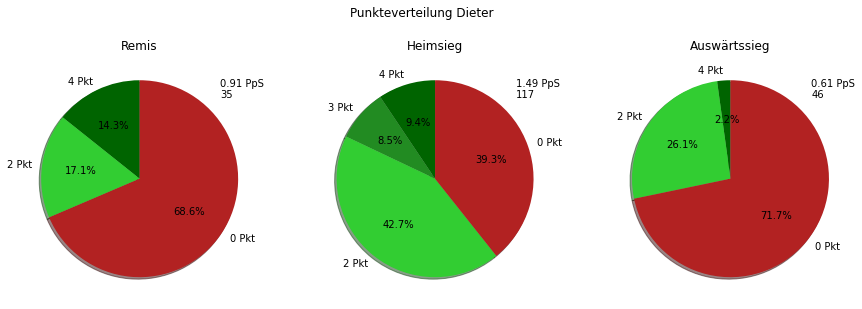

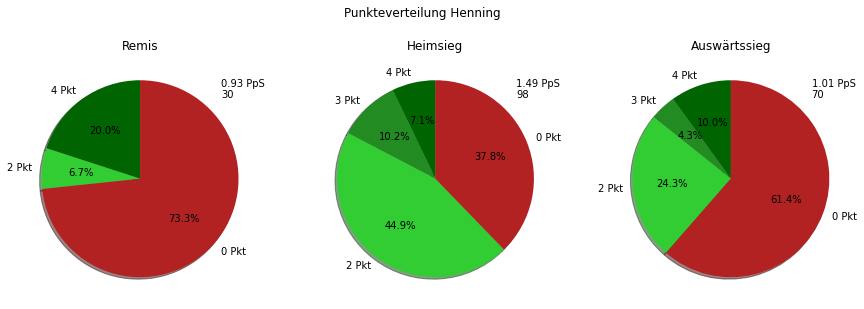

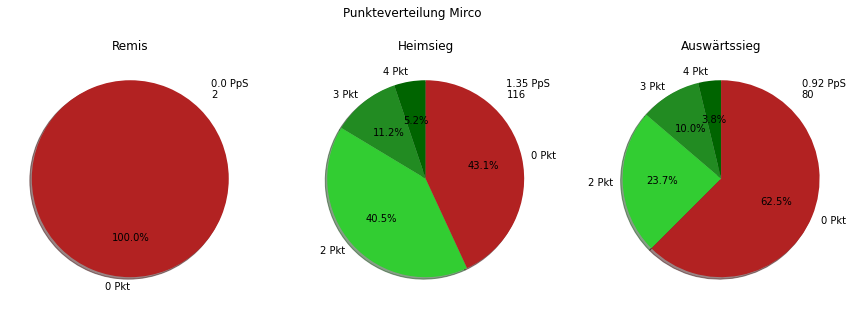

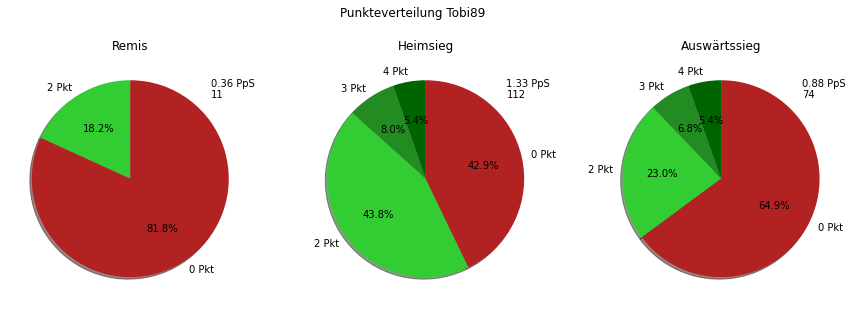

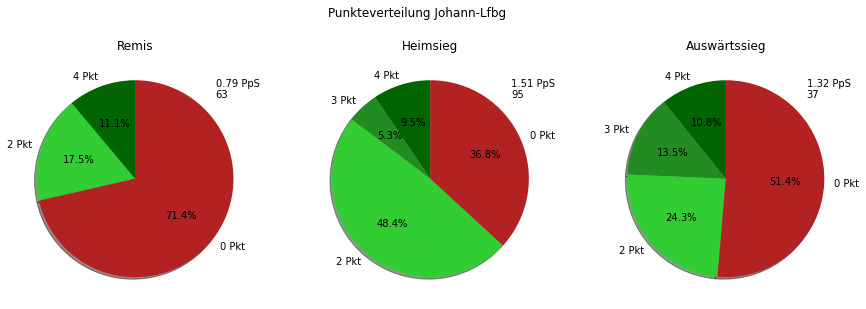

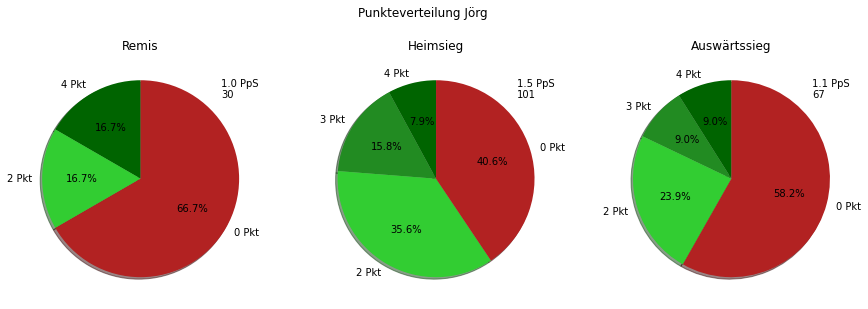

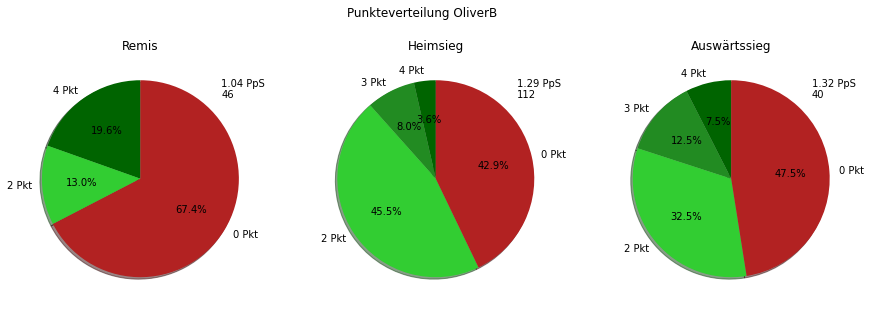

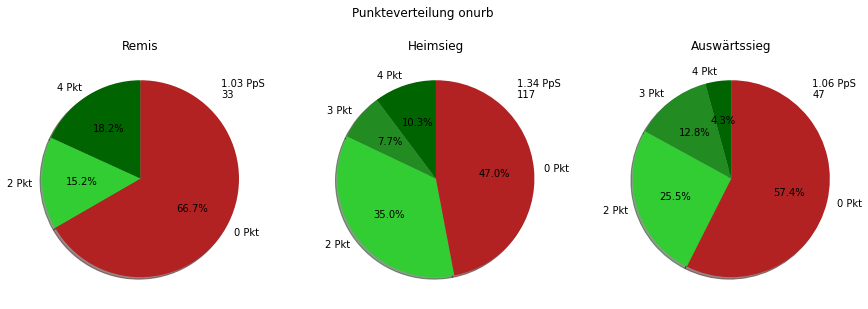

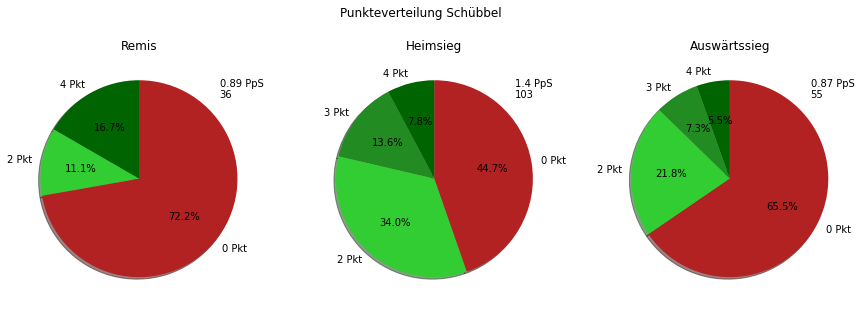

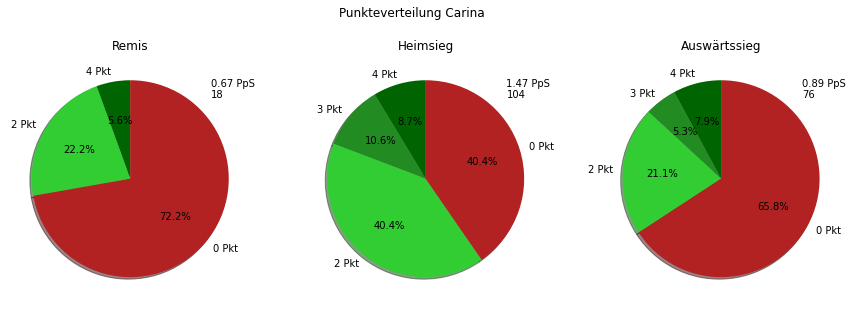

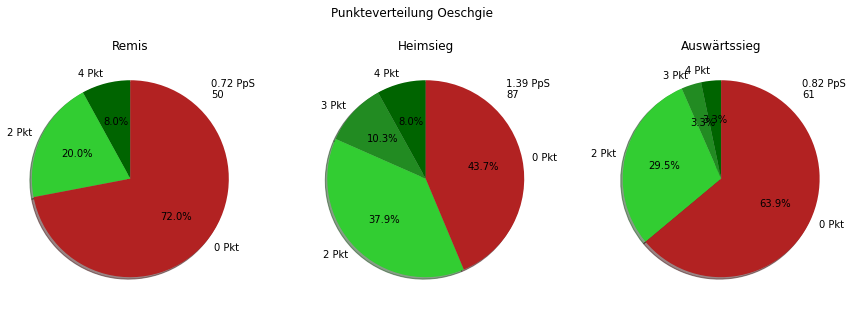

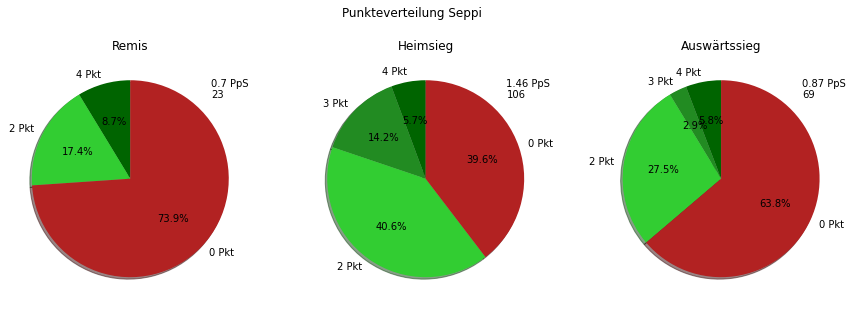

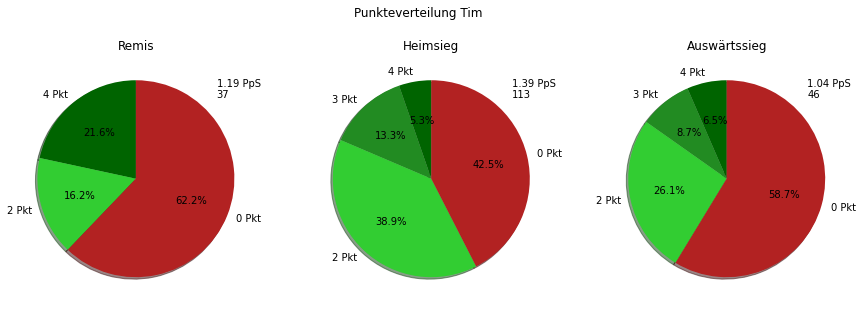

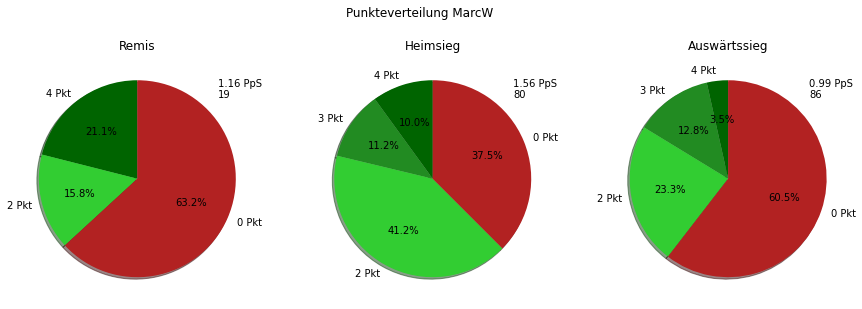

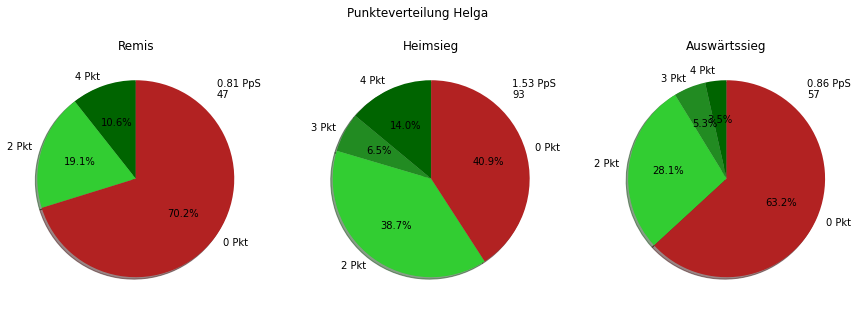

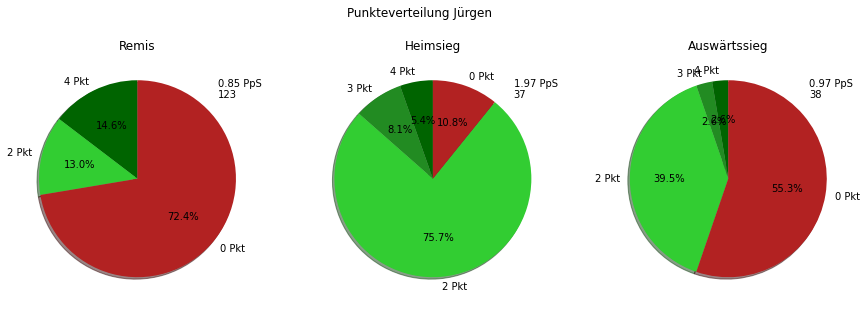

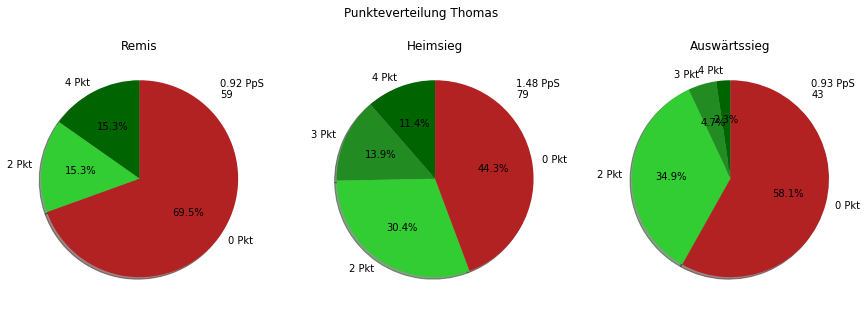

In [25]:
import matplotlib.pyplot as plt
for key in matrix.keys():
  # print(teilnehmer[key])
  # print(matrix[key])
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
  fig.suptitle('Punkteverteilung ' + teilnehmer[key])
  labels = '4 Pkt', '3 Pkt', '2 Pkt', '0 Pkt'
  color = 'darkgreen', 'forestgreen', 'limegreen', 'firebrick'
  a = [index for index,value in enumerate(matrix[key][0]) if value != 0]
  ax1.pie([matrix[key][0][ele] for ele in a], labels=[labels[ele] for ele in a], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=[color[ele] for ele in a])
  ax1.text(0.82,0.82, str(int(sum(matrix[key][0]))))
  ax1.text(0.82,0.94, str(round((4*matrix[key][0][0]+3*matrix[key][0][1]+2*matrix[key][0][2]) / sum(matrix[key][0]),2)) + " PpS")
  ax1.set_title('Remis')
  a = [index for index,value in enumerate(matrix[key][1]) if value != 0]
  ax2.pie([matrix[key][1][ele] for ele in a], labels=[labels[ele] for ele in a], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=[color[ele] for ele in a])
  ax2.text(0.82,0.82, str(int(sum(matrix[key][1]))))
  ax2.text(0.82,0.94, str(round((4*matrix[key][1][0]+3*matrix[key][1][1]+2*matrix[key][1][2]) / sum(matrix[key][1]),2)) + " PpS")
  ax2.set_title('Heimsieg')
  a = [index for index,value in enumerate(matrix[key][2]) if value != 0]
  ax3.pie([matrix[key][2][ele] for ele in a], labels=[labels[ele] for ele in a], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=[color[ele] for ele in a])
  ax3.text(0.82,0.82, str(int(sum(matrix[key][2]))))
  ax3.text(0.82,0.94, str(round((4*matrix[key][2][0]+3*matrix[key][2][1]+2*matrix[key][2][2]) / sum(matrix[key][2]),2)) + " PpS")
  ax3.set_title('Auswärtssieg')
  plt.show()
  

In [30]:
math.floor(2)

2

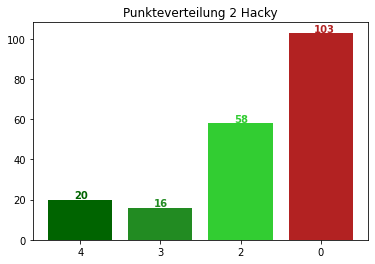

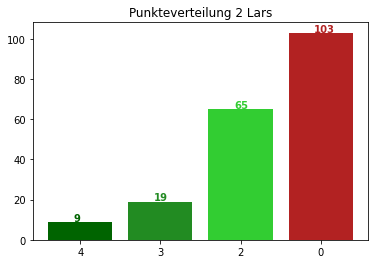

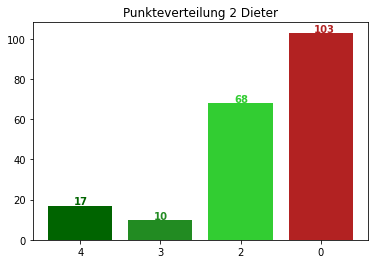

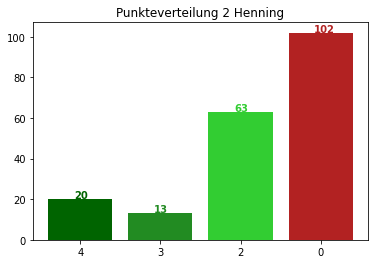

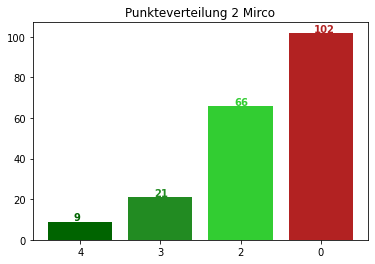

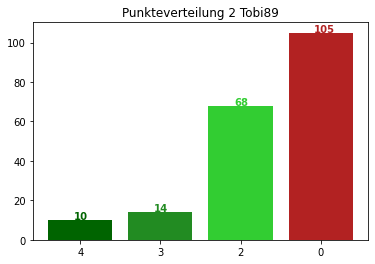

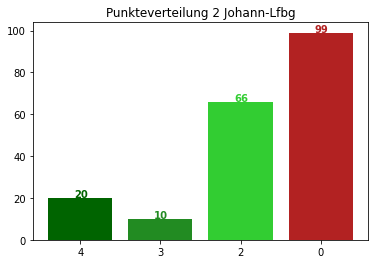

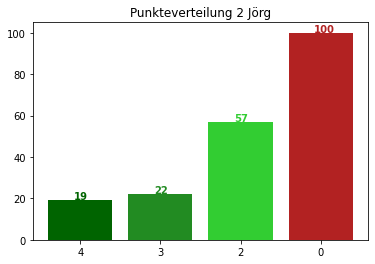

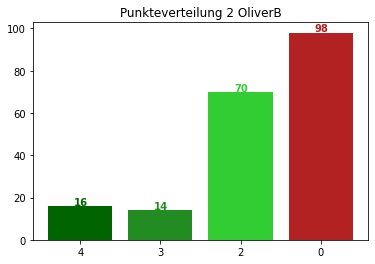

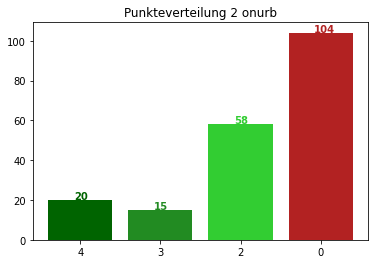

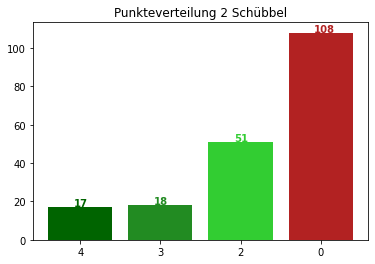

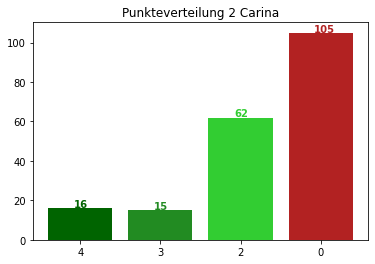

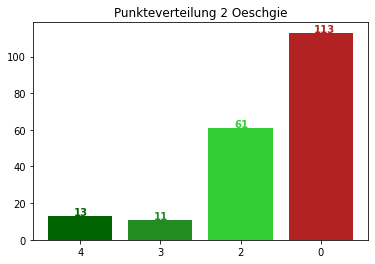

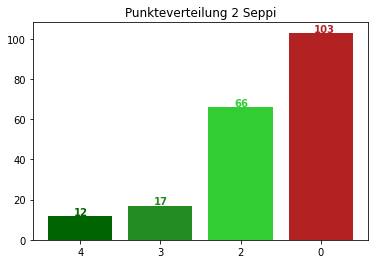

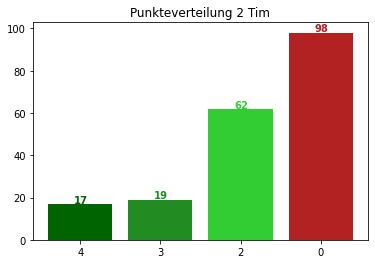

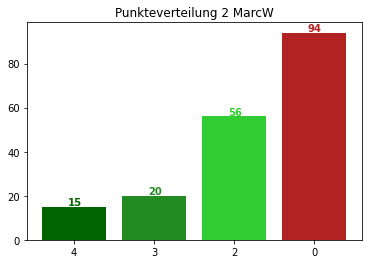

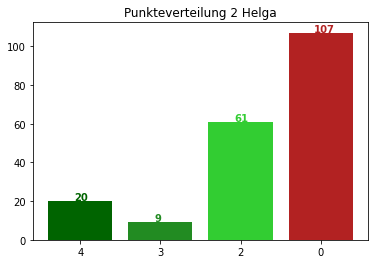

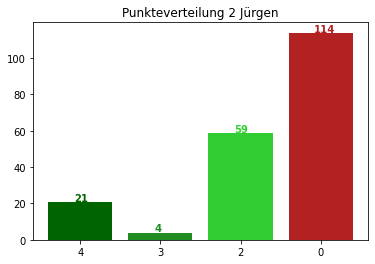

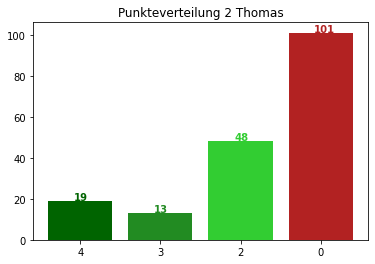

In [35]:
import matplotlib.pyplot as plt
for key in matrix.keys():
  # print(teilnehmer[key])
  # print(matrix[key])
  plt.title('Punkteverteilung 2 ' + teilnehmer[key])
  labels = '4 Pkt', '3 Pkt', '2 Pkt', '0 Pkt'
  color = 'darkgreen', 'forestgreen', 'limegreen', 'firebrick'
  plt.bar(x=[0,1,2,3], height=np.sum(matrix[key], axis=0), color=color)
  plt.xticks([0,1,2,3], ['4', '3', '2', '0'])
  for i,j in enumerate(np.sum(matrix[key], axis=0)):
    plt.text(i-0.08,j+0.5, str(math.floor(np.sum(matrix[key], axis=0)[i])), color=color[i], fontweight='bold')
  plt.show()

In [36]:
def tab(Heimteam, heimT, auswT):
  gew, remis, verl = 0, 0, 0
  if Heimteam:
    tore = heimT
    gtore = auswT
  else:
    tore = auswT
    gtore = heimT
  diff = tore - gtore
  if diff > 0:
    gew += 1
  elif diff == 0:
    remis += 1
  else:
    verl += 1
  punkte = 3*gew + remis
  return gew, remis, verl, tore, gtore, diff, punkte

In [37]:
# Actual Table!
def table(bis_spieltag):
  table = np.zeros((18,9)) # Team, Spiele, Gew, Remis, Verl, Tore, GTore, Diff, Punkte
  for i in range(18):
    table[i][0] = i + 1
  for k in range(bis_spieltag):
    for j in range(18):
      Team = results[k][0][j]
      if j%2 == 0: #Heimteam
        Heimteam = True
        hTo = results[k][130][j] # Heimtore
        aTo = results[k][130][j+1] # Auswärtstore
      else: 
        Heimteam = False
        hTo = results[k][130][j-1] # Heimtore
        aTo = results[k][130][j] # Auswärtstore
      gew, remis, verl, tore, gtore, diff, punkte = tab(Heimteam, hTo, aTo)
      spiele = 1
      t = [spiele, gew, remis, verl, tore, gtore, diff, punkte]
      for i in range(len(t)):
        # print(table)
        table[np.where(table[:,0] == Team)[0][0]][i+1] += t[i]  
  return table

In [38]:
table = table(22)
table[table[:, 8].argsort()]
tabelle = table[table[:, 5].argsort()]  # goals
tabelle = tabelle[tabelle[:, 7].argsort(kind='mergesort')]  # diff
tabelle = tabelle[tabelle[:, 8].argsort(kind='mergesort')]  # points
tabelle = np.flip(tabelle,0)
ta = pd.DataFrame(data=np.zeros((18,9)), columns=['Team', 'Spiele', 'Siege', 'Remis', 'Verl.', 'Tore', 'Gegent.', 'Diff', 'Punkte'], index=[str(ele) + '.' for ele in range(1,19)])
ta.iloc[:,1:] = tabelle[:,1:]
for key in teams.keys():
  ta.iloc[np.where(tabelle[:,0] == teams[key])[0][0],0] = key
for i in ['Spiele', 'Siege', 'Remis', 'Verl.', 'Tore', 'Gegent.', 'Diff', 'Punkte']:
  ta[i] = ta[i].astype(int)
ta

,Team,Spiele,Siege,Remis,Verl.,Tore,Gegent.,Diff,Punkte
1.,Bayern,22,17,1,4,71,25,46,52
2.,Dortmund,22,15,1,6,57,36,21,46
3.,Leverkusen,22,12,5,5,58,36,22,41
4.,Leipzig,22,10,4,8,43,27,16,34
5.,Hoffenheim,22,10,4,8,43,34,9,34
6.,Freiburg,22,9,7,6,34,25,9,34
7.,Union Berlin,22,9,7,6,29,30,-1,34
8.,Köln,22,8,8,6,34,37,-3,32
9.,Mainz,22,9,4,9,31,24,7,31
10.,Frankfurt,22,8,7,7,33,34,-1,31


In [39]:
def table(bis_spieltag):
  full_table = dict()
  for i in range(len(teilnehmer)):
    table = np.zeros((18,9)) # Team, Spiele, Gew, Remis, Verl, Tore, GTore, Diff, Punkte
    for k in range(18):
      table[k][0] = k + 1
    for k in range(bis_spieltag):
      player = list(teilnehmer)[i]
      row_tipps = np.where(tipps[k] == player)[0][0] # 1-19
      for j in range(18):
        Team = results[k][0][j]
        col_team = np.where(tipps[k][0] == Team)[0][0] #Spalte des Teams
        if j%2 == 0: #Heimteam
          Heimteam = True
          hTi = tipps[k][row_tipps][col_team]
          aTi = tipps[k][row_tipps][col_team+1]
          # hTo = results[k][130][j] # Heimtore
          # aTo = results[k][130][j+1] # Auswärtstore
        else: 
          Heimteam = False
          hTi = tipps[k][row_tipps][col_team-1]
          aTi = tipps[k][row_tipps][col_team]
          # hTo = results[k][130][j-1] # Heimtore
          # aTo = results[k][130][j] # Auswärtstore
        try:
          hTi = int(hTi)
          aTi = int(aTi)
          gew, remis, verl, tore, gtore, diff, punkte = tab(Heimteam, hTi, aTi)
          spiele = 1
          t = [spiele, gew, remis, verl, tore, gtore, diff, punkte]
          for l in range(len(t)):
            # print(table)
            table[np.where(table[:,0] == Team)[0][0]][l+1] += t[l]  
        except:
          pass
    full_table[player] = table
  return full_table

In [43]:
full_t = table(22)
for k in full_t.keys():
  table = full_t[k]
  table[table[:, 8].argsort()]
  tabelle = table[table[:, 5].argsort()]  # goals
  tabelle = tabelle[tabelle[:, 7].argsort(kind='mergesort')]  # diff
  tabelle = tabelle[tabelle[:, 8].argsort(kind='mergesort')]  # points
  tabelle = np.flip(tabelle,0)
  ta = pd.DataFrame(data=np.zeros((18,9)), columns=['Team', 'Spiele', 'Siege', 'Remis', 'Verl.', 'Tore', 'Gegent.', 'Diff', 'Punkte'], index=[str(ele) + '.' for ele in range(1,19)])
  ta.iloc[:,1:] = tabelle[:,1:]
  for key in teams.keys():
    ta.iloc[np.where(tabelle[:,0] == teams[key])[0][0],0] = key
  for i in ['Spiele', 'Siege', 'Remis', 'Verl.', 'Tore', 'Gegent.', 'Diff', 'Punkte']:
    ta[i] = ta[i].astype(int)
  print(teilnehmer[k])
  print(ta)

Hacky
             Team  Spiele  Siege  Remis  Verl.  Tore  Gegent.  Diff  Punkte
1.       Freiburg      22     22      0      0    51       13    38      66
2.         Bayern      22     21      0      1    69       10    59      63
3.     Leverkusen      22     15      4      3    45       22    23      49
4.      Wolfsburg      22     13      4      5    38       28    10      43
5.       Dortmund      22     12      5      5    39       26    13      41
6.     Hoffenheim      22     12      5      5    35       27     8      41
7.      Frankfurt      22     10      6      6    31       25     6      36
8.     M'gladbach      22      7      9      6    30       26     4      30
9.           Köln      21      7      8      6    29       30    -1      29
10.  Union Berlin      22      5     11      6    27       31    -4      26
11.     Stuttgart      22      6      6     10    25       34    -9      24
12.         Mainz      22      5      8      9    26       29    -3      23
13.   

In [44]:
def tipped_results():
  tipps_freq = dict()
  for i in range(len(teilnehmer)):
    dict_tipps = dict()
    player = list(teilnehmer)[i]
    for k in range(17):
      row_tipps = np.where(tipps[k] == player)[0][0] # 1-19
      for j in range(9):
        hTe = results[k][0][j*2] # Heimteam
        aTe = results[k][0][j*2+1] # Auswärtsteam
        col_team1 = np.where(tipps[k][0] == hTe)[0][0] #Spalte des Teams
        col_team2 = np.where(tipps[k][0] == aTe)[0][0] #Spalte des Teams
        hTi = tipps[k][row_tipps][col_team1] # Heimtipps
        aTi = tipps[k][row_tipps][col_team2] # Auswärtstipps
        try:
          if str(int(hTi)) + ':' + str(int(aTi)) not in dict_tipps.keys():
            dict_tipps[str(int(hTi)) + ':' + str(int(aTi))] = 1
          else:
            dict_tipps[str(int(hTi)) + ':' + str(int(aTi))] += 1
        except:
          pass
    tipps_freq[[*teilnehmer][i]] = dict_tipps
  return tipps_freq

In [ ]:
tipps_freq = tipped_results()

In [46]:
for key in tipps_freq.keys():
  print(teilnehmer[key], [(k, tipps_freq[key][k]) for k in sorted(tipps_freq[key], key=tipps_freq[key].get, reverse=True)])#, tipps_freq[key])

Hacky [('1:1', 28), ('2:0', 26), ('2:1', 23), ('1:2', 14), ('1:3', 13), ('3:0', 9), ('0:2', 7), ('2:2', 6), ('3:1', 6), ('4:0', 5), ('0:1', 4), ('0:3', 4), ('1:0', 3), ('5:0', 1), ('0:4', 1), ('2:3', 1), ('1:4', 1)]
Lars [('0:1', 28), ('1:0', 26), ('0:2', 24), ('2:0', 23), ('2:1', 15), ('1:2', 8), ('3:0', 6), ('3:1', 6), ('1:1', 6), ('0:3', 3), ('0:0', 2), ('1:3', 2), ('3:2', 1), ('0:4', 1), ('2:2', 1)]
Dieter [('3:1', 28), ('2:1', 27), ('1:1', 20), ('1:2', 19), ('1:3', 13), ('2:0', 11), ('2:2', 9), ('4:1', 5), ('3:0', 4), ('4:0', 4), ('1:0', 4), ('1:4', 3), ('2:3', 3), ('3:2', 2), ('1:5', 1)]
Henning [('1:2', 45), ('2:1', 35), ('1:1', 24), ('3:2', 14), ('3:1', 13), ('2:0', 6), ('2:3', 5), ('2:2', 4), ('3:0', 3), ('1:3', 2), ('1:4', 1), ('0:2', 1)]
Mirco [('2:1', 38), ('1:0', 37), ('1:2', 34), ('0:1', 22), ('2:0', 11), ('3:0', 3), ('0:2', 3), ('3:1', 2), ('1:1', 2), ('0:3', 1)]
Tobi89 [('2:0', 30), ('2:1', 24), ('3:1', 20), ('0:1', 17), ('0:2', 17), ('0:3', 8), ('1:0', 8), ('1:3', 7), 

In [48]:
def correlation():
  for i in range(len(teilnehmer)):
    player = list(teilnehmer)[i]
    sign_list = np.array(player)
    for k in range(17):
      row_tipps = np.where(tipps[k] == player)[0][0] # 1-19
      for j in range(9):
        hTe = results[k][0][j*2] # Heimteam
        aTe = results[k][0][j*2+1] # Auswärtsteam
        col_team1 = np.where(tipps[k][0] == hTe)[0][0] #Spalte des Teams
        col_team2 = np.where(tipps[k][0] == aTe)[0][0] #Spalte des Teams
        hTi = tipps[k][row_tipps][col_team1] # Heimtipps
        aTi = tipps[k][row_tipps][col_team2] # Auswärtstipps
        sign_list = np.append(sign_list, np.sign(hTi-aTi))
    if i == 0:
      sign_list_all = sign_list
    else:
      sign_list_all = np.vstack([sign_list_all, sign_list])
  return sign_list_all
cor_table = correlation()

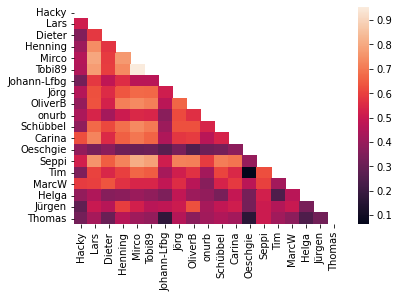

In [53]:
cor = cor_table[:,1:]
pd.DataFrame(cor.T).corr()
corr = pd.DataFrame(cor.T).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,
            xticklabels=[teilnehmer[int(ele)] for ele in cor_table[:,0]],
            yticklabels=[teilnehmer[int(ele)] for ele in cor_table[:,0]])

In [58]:
def points_got_for_each_team(bis_spieltag):
  points_dict = dict()
  for i in range(len(teilnehmer)):
    ppt = np.zeros((18))
    player = list(teilnehmer)[i]
    for k in range(bis_spieltag):
      row_tipps = np.where(tipps[k] == player)[0][0] # 1-19
      for j in range(9):
        hTe = results[k][0][j*2] # Heimteam
        aTe = results[k][0][j*2+1] # Auswärtsteam
        col_team1 = np.where(tipps[k][0] == hTe)[0][0] #Spalte des Teams
        col_team2 = np.where(tipps[k][0] == aTe)[0][0] #Spalte des Teams
        hTo = results[k][130][j*2] # Heimtore
        aTo = results[k][130][j*2+1] # Auswärtstore
        hTi = tipps[k][row_tipps][col_team1] # Heimtipps
        aTi = tipps[k][row_tipps][col_team2] # Auswärtstipps
        # print(calc_points(hTi, aTi, hTo, aTo))
        # print(hTi, aTi, hTo, aTo)
        # print(calc_points(hTi, aTi, hTo, aTo),calc_points(hTi, aTi, hTo, aTo))
        try:
          ppt[int(hTe)-1] += calc_points(hTi, aTi, hTo, aTo)
          ppt[int(aTe)-1] += calc_points(hTi, aTi, hTo, aTo)
        except:
          pass

    points_dict[player] = ppt
  return points_dict

In [60]:
points_list = points_got_for_each_team(22)

In [61]:
points_tab = pd.DataFrame(data=points_list, index=[key for key in teams.keys()])
for col in points_tab.columns:
  points_tab[col] = points_tab[col].astype(int)
  points_tab = points_tab.rename({col: teilnehmer[col]}, axis=1)
points_tab

,Hacky,Lars,Dieter,Henning,Mirco,Tobi89,Johann-Lfbg,Jörg,OliverB,onurb,Schübbel,Carina,Oeschgie,Seppi,Tim,MarcW,Helga,Jürgen,Thomas
Augsburg,26,21,21,20,21,21,18,17,25,22,18,20,20,25,20,18,23,22,26
Bayern,36,30,24,34,36,32,27,40,38,41,36,38,22,34,32,26,40,28,36
Bielefeld,38,18,24,25,21,25,30,23,28,21,35,23,16,16,35,24,26,38,19
Berlin,24,22,18,24,29,25,19,24,26,19,15,29,14,25,27,20,23,23,28
Bochum,18,23,26,23,30,24,24,22,28,33,18,17,20,22,32,19,12,21,19
Dortmund,28,43,32,38,43,42,39,36,34,24,37,34,31,40,47,30,42,29,13
Frankfurt,13,20,17,27,21,14,22,28,28,19,24,18,14,15,21,17,26,30,12
Freiburg,23,19,24,27,14,16,25,22,21,19,11,23,21,17,24,26,22,30,30
Fürth,41,35,37,37,33,34,29,44,46,41,37,34,28,32,37,31,32,32,35
Hoffenheim,29,22,33,22,25,23,27,17,17,25,21,27,27,31,34,22,28,14,21
